# DETROIT CRIME ANALYSIS
##### This project focuses on developing a **time-series forecasting** system to optimize public safety strategies and resource allocation. By building an **end-to-end data pipeline**, the project aggregates and **geocodes** large-scale crime incident reports to identify **spatial-temporal patterns**.

##### The core technical effort involves **training and benchmarking statistical models (SARIMA, Prophet)** against advanced **deep learning architectures (LSTM, BLSTM)** to determine the most accurate predictors of criminal activity. These models are utilized to generate long-term forecasts, specifically pinpointing high-risk districts. The final output transforms raw data into actionable intelligence, enabling data-driven decisions for effective police deployment and crime prevention.

---

## PART 1 - Data Acquisition & Initial Exploration

##### The Datasets are downloaded from [Detroit Open Data Portal](https://data.detroitmi.gov/datasets "Detroit Open Data Portal").
##### 1. This initial phase focused on architecting a data ingestion to support downstream predictive modeling. The objective was to synthesize heterogeneous datasets to investigate the relationship between public safety and licensed establishments.
##### 2. Extraction of [RMS Crime Incidents](https://data.detroitmi.gov/datasets/detroitmi::rms-crime-incidents/explore?location=42.347872%2C-83.095882%2C10.53) from the Detroit Open Data API (2016–Present) and State of Michigan [Liquor License records](https://data.detroitmi.gov/datasets/detroitmi::liquor-licenses-current/explore?location=42.302893%2C-83.018479%2C10.20).
##### 3. To ensure analytical reliability, conducted a rigorous Exploratory Data Analysis (EDA) and data quality assessment. Leveraging pandas for manipulation and matplotlib for visualization, generated comprehensive data quality reports. These audits—ranging from missing value trends over time to temporal coverage timelines—established a verified, clean baseline for the project, eliminating data inconsistencies prior to the modeling stage.

##### importing the data

In [ ]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

crime_incidents = pd.read_csv('data/rms_crime_incidents.csv')
crime_incidents.head()

,X,Y,incident_entry_id,nearest_intersection,offense_category,offense_description,state_offense_code,arrest_charge,charge_description,incident_occurred_at,...,report_number,scout_car_area,police_precinct,census_block_2020_geoid,neighborhood,council_district,zip_code,longitude,latitude,ESRI_OID
0,-83.063429,42.438083,1353441-2900,E Lantz St & Ryan Rd,DAMAGE TO PROPERTY,DAMAGE TO PROPERTY ...,2900,29000,DAMAGE TO PROPERTY ...,2025/10/23 20:00:00+00,...,2510230243,1103,11,2.616351e+14,Farwell,3.0,48234.0,-83.063429,42.438083,1
1,-83.142083,42.330868,775415-2601,Ternes & Elmer St,FRAUD,FRAUD - FALSE PRETENSE / SWINDLE / CONFIDENCE ...,2601,26001,FRAUD - FALSE PRETENSE / SWINDLE / CONFIDENCE ...,2022/02/07 23:00:00+00,...,2202100094,0408,04,2.616353e+14,Claytown,6.0,48210.0,-83.142083,42.330868,2
2,-83.110524,42.356219,930596-3072,W I 96 Service Drive & W Grand Blvd,FRAUD,RETAIL FRAUD - THEFT,3002,30002,RETAIL FRAUD - THEFT,2023/02/25 01:00:00+00,...,2302240305,1006,10,2.616353e+14,Petoskey-Otsego,6.0,48204.0,-83.110524,42.356219,3
3,-83.203400,42.367762,1353454-2900,Orangelawn St & Mansfield St,DAMAGE TO PROPERTY,DAMAGE TO PROPERTY ...,2900,29000,DAMAGE TO PROPERTY ...,2025/10/23 22:09:00+00,...,2510230288,0608,06,2.616355e+14,Joy Community,7.0,48227.0,-83.203400,42.367762,4
4,-83.102050,42.423941,640474-1301,John R St & E Montana St,ASSAULT,ASSAULT AND BATTERY/SIMPLE ASSAULT,1301,13001,ASSAULT AND BATTERY/SIMPLE ASSAULT,2021/03/05 01:29:00+00,...,2103050008,1205,12,2.616351e+14,Grixdale Farms,3.0,48203.0,-83.102050,42.423941,5


##### Checking for Null Values

In [18]:
pd.isnull(crime_incidents).sum()

X                            956
Y                            956
incident_entry_id              0
nearest_intersection         956
offense_category               0
offense_description            0
state_offense_code             0
arrest_charge                  0
charge_description             0
incident_occurred_at           0
incident_time                  0
incident_day_of_week           0
incident_hour_of_day           0
incident_year                  0
case_id                        0
case_status                    0
case_status_updated_at         7
updated_in_ibr_at          72789
updated_at                    24
crime_id                       0
report_number                  0
scout_car_area                 0
police_precinct                0
census_block_2020_geoid     2962
neighborhood                6583
council_district            7664
zip_code                    6670
longitude                    956
latitude                     956
ESRI_OID                       0
dtype: int

##### percentage of null values for all columns

In [26]:
total_rows = len(crime_incidents)
percentage_missing_values = (crime_incidents.isnull().sum() / total_rows) * 100

print("Percentage of Null Values per Column:")
print(percentage_missing_values)

Percentage of Null Values per Column:
X                          0.127356
Y                          0.127356
incident_entry_id          0.000000
nearest_intersection       0.127356
offense_category           0.000000
offense_description        0.000000
state_offense_code         0.000000
arrest_charge              0.000000
charge_description         0.000000
incident_time              0.000000
incident_day_of_week       0.000000
incident_hour_of_day       0.000000
incident_year              0.000000
case_id                    0.000000
case_status                0.000000
case_status_updated_at     0.000933
updated_in_ibr_at          9.696796
updated_at                 0.003197
crime_id                   0.000000
report_number              0.000000
scout_car_area             0.000000
police_precinct            0.000000
census_block_2020_geoid    0.394591
neighborhood               0.876973
council_district           1.020982
zip_code                   0.888563
longitude                 

##### Initial Latitude and Longitude plotting

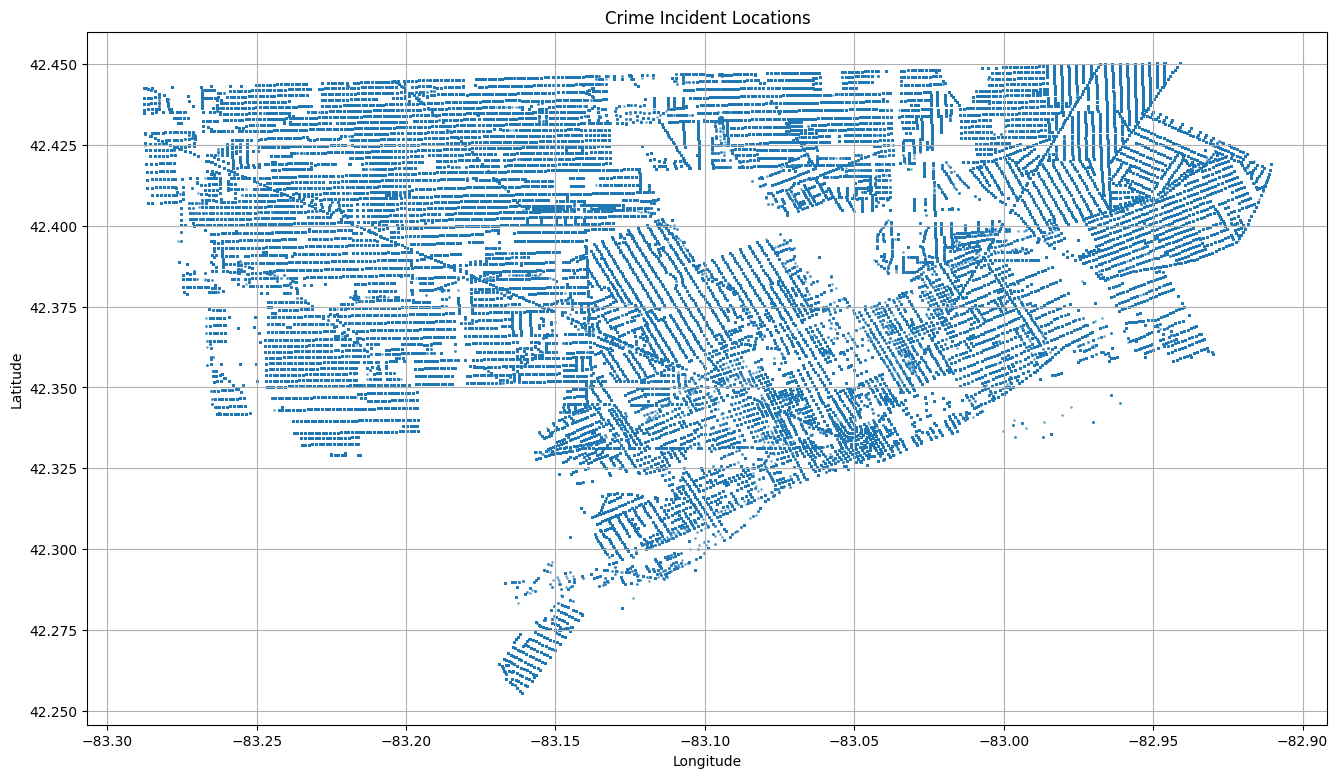

In [19]:
import matplotlib.pyplot as plt

plt.figure(figsize=(16, 9))
plt.scatter(crime_incidents['longitude'], crime_incidents['latitude'], alpha=0.5, s=1)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Crime Incident Locations')
plt.grid(True)
plt.show()

##### Distribution checks for all the numerical columns

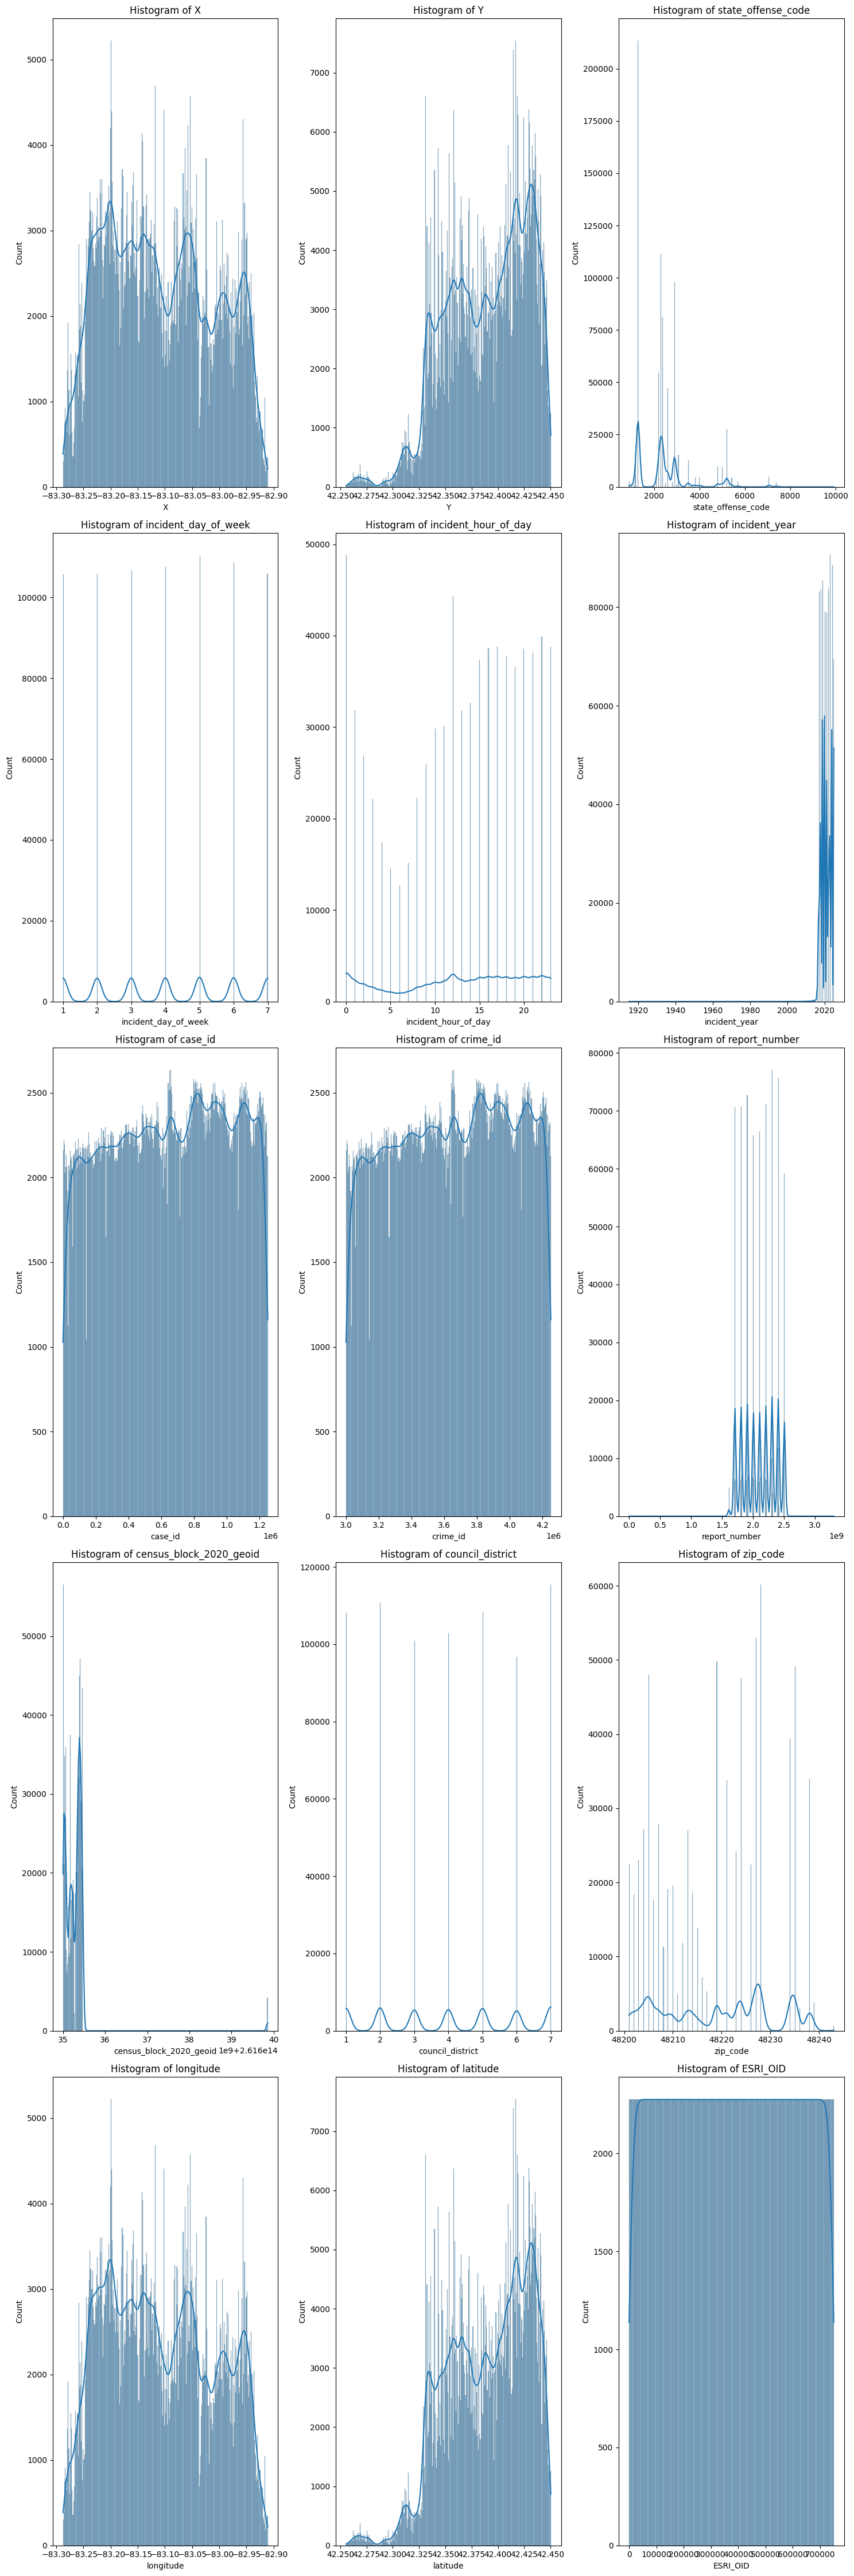

In [20]:
import seaborn as sns

numerical_cols = crime_incidents.select_dtypes(include=['number']).columns

plt.figure(figsize=(15, len(numerical_cols) * 3))
for i, col in enumerate(numerical_cols):
    plt.subplot((len(numerical_cols) + 2) // 3, 3, i + 1)
    sns.histplot(x=crime_incidents[col], kde=True, bins=330)
    plt.title(f'Histogram of {col}')

plt.tight_layout()
plt.show()

##### Correlation Heatmap

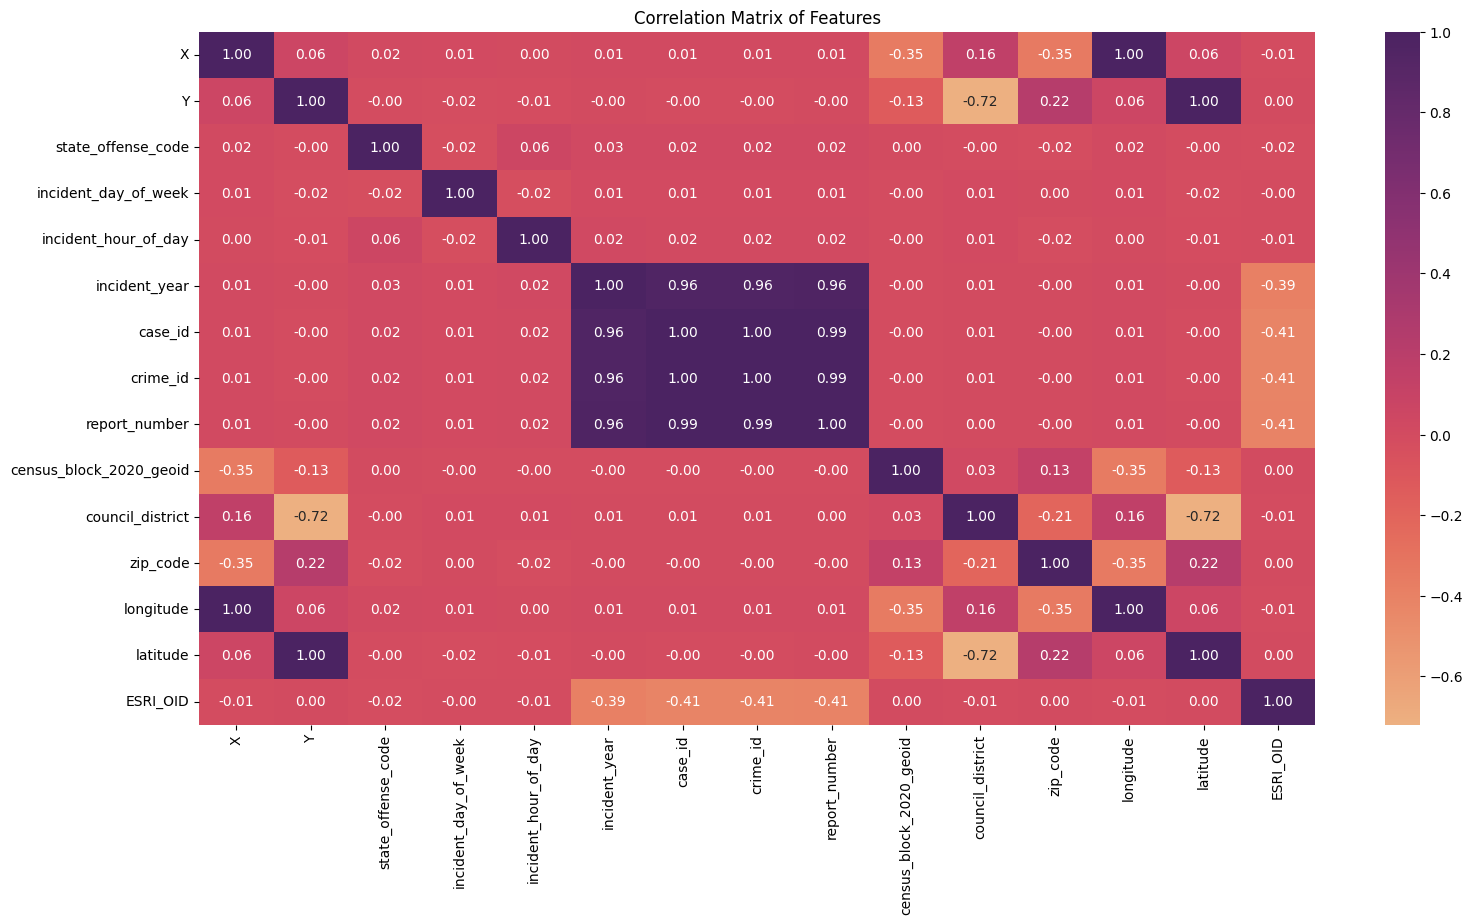

In [21]:
numerical_data = crime_incidents.select_dtypes(include=['number'])
correlation_matrix = numerical_data.corr()

plt.figure(figsize=(18, 9))
sns.heatmap(correlation_matrix, annot=True, cmap='flare', fmt=".2f")
plt.title('Correlation Matrix of Features')
plt.show()

##### Conversion of Datetime variable and setting it as Index

In [24]:
crime_incidents['incident_occurred_at'] = pd.to_datetime(crime_incidents['incident_occurred_at'])
crime_incidents = crime_incidents.set_index('incident_occurred_at')
crime_incidents.index

DatetimeIndex(['2025-10-23 20:00:00+00:00', '2022-02-07 23:00:00+00:00',
               '2023-02-25 01:00:00+00:00', '2025-10-23 22:09:00+00:00',
               '2021-03-05 01:29:00+00:00', '2023-11-10 02:30:00+00:00',
               '2016-12-10 20:00:00+00:00', '2016-12-13 02:00:00+00:00',
               '2016-11-07 20:30:00+00:00', '2021-03-04 16:00:00+00:00',
               ...
               '2024-04-01 03:00:00+00:00', '2022-05-08 18:00:00+00:00',
               '2024-07-10 16:22:00+00:00', '2021-10-21 09:58:00+00:00',
               '2024-08-03 23:38:00+00:00', '2024-03-30 16:00:00+00:00',
               '2024-07-16 14:21:00+00:00', '2021-07-28 10:00:00+00:00',
               '2021-09-30 23:04:00+00:00', '2023-09-06 16:00:00+00:00'],
              dtype='datetime64[ns, UTC]', name='incident_occurred_at', length=750650, freq=None)

##### Missing Value Counts for each variable over timeline

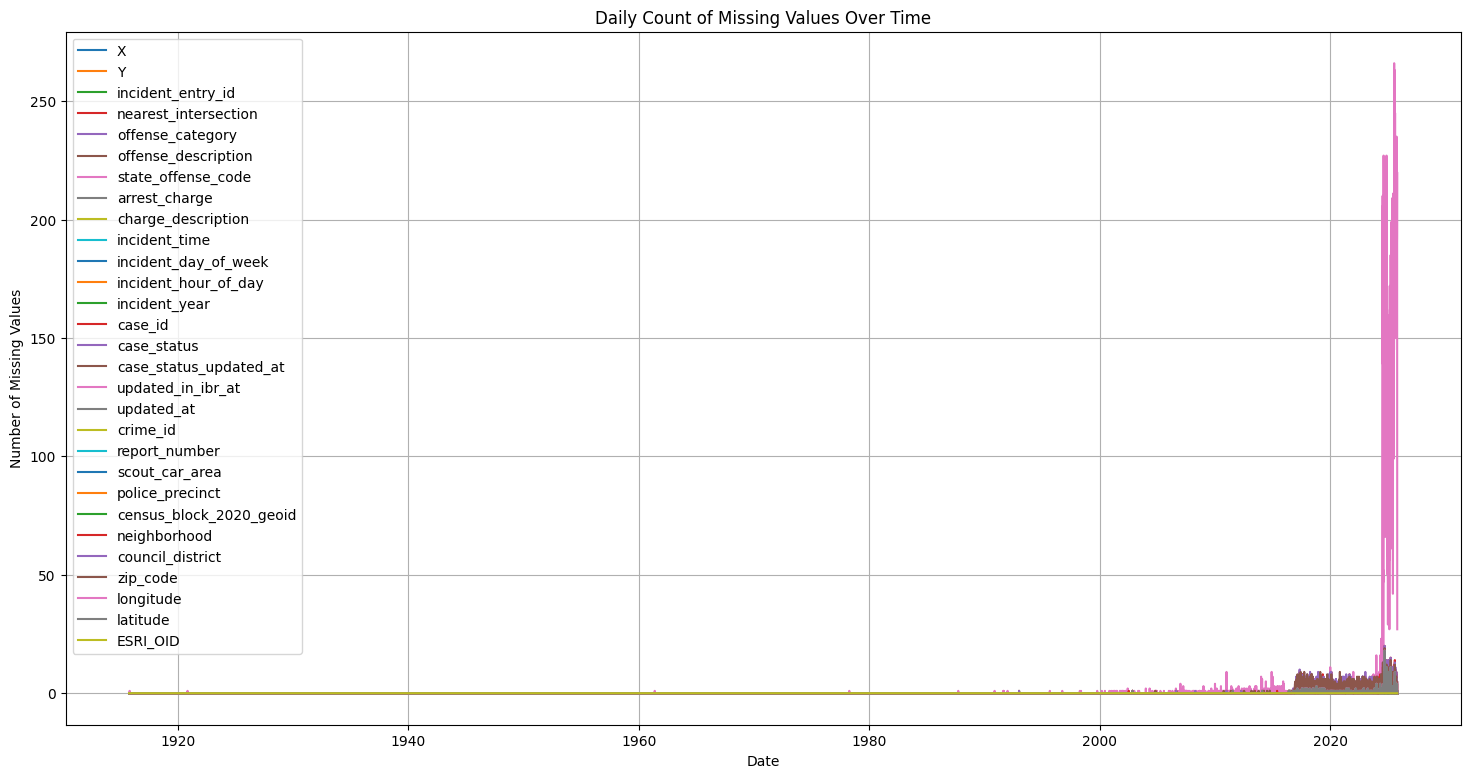

In [25]:
daily_missing_values = crime_incidents.isnull().resample('D').sum()

plt.figure(figsize=(18, 9))
for column in daily_missing_values.columns:
    plt.plot(daily_missing_values.index, daily_missing_values[column], label=column)

plt.title('Daily Count of Missing Values Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Missing Values')
plt.legend()
plt.grid(True)
plt.show()